Import necessary packages.

In [1]:
# import all functions from python labrary: sympy
from sympy import *
# import python library: matplotlib (for nice plots)
import matplotlib
# set sympy output to print pretty math expressions
init_printing()

Declare variables we are going to use as 'symbols'. We will add more along the way, if necessary.

In [2]:
xi, gi, G, Gi, wi, alpha, beta = symbols('x_i g_i G G_{-i} w_i alpha beta')

# Class example: Ottoni-Wilhelm et al. AER 2017 example

## Setup the optimization program

Our optimization problem is
\begin{align}
    & \max_{x_i,g_i}\quad u(x_i, G, g_i) = u(x_i, g_i + G_{-i}, g_i) \\
    \text{s.t.}\quad & x_i + g_i = w_i
\end{align}

---

For 3 goods, $(q_1,q_2,q_3)$, CD utility function would be something like
$$u(q_1, q_2, q_3) = q_1^{\alpha} q_2^{\beta} q_3^{1-\alpha-\beta}$$

Thus, for $u(x_i, g_i + G_{-i}, g_i)$, its CD form would be similar to
$$u(x_i, g_i + G_{-i}, g_i) = x_i^{\alpha} (g_i + G_{-i})^{\beta} g_i^{1-\alpha-\beta}$$

Its ln form would be something like
$$u(x_i, g_i + G_{-i}, g_i) = \alpha\ln(x_i) + \beta\ln(g_i + G_{-i}) + (1-\alpha-\beta)ln(g_i)$$

## Setup the utility function

In [3]:
# Note: in sympy syntax: use double star ** for power
u = (1-alpha-beta) * ln(xi) + alpha * ln(gi + Gi) + beta * ln(gi)
# show the defined function
u

## Setup the lagrangian

In [4]:
lam = symbols('lambda')
lagr = u + lam *(wi - xi - gi)
lagr

Solve the first-order conditions. 

Note the syntax of the solve function, especially the use of the brackets:
solve( (eq1, eq2, eq3), var1, var2, var3)

The equations are by default treated as equal to 0 by the solver.

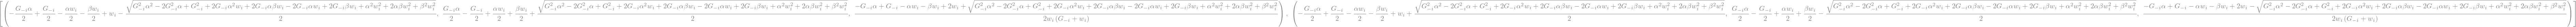

In [5]:
foc_sol = solve(( diff(lagr,xi), diff(lagr,gi), diff(lagr,lam) ), xi,gi,lam)
foc_sol

The solution is a list. We have two solutions here. Let's check.

The first solution is positive in $x_i$ and $g_i$

In [6]:
foc_sol[0][0].subs([(alpha,0.4),(beta,0.1),(wi,40),(Gi,40)])

In [7]:
foc_sol[0][1].subs([(alpha,0.4),(beta,0.1),(wi,40),(Gi,40)])

The second solution can be negative in $x_i$ and $g_i$

In [8]:
foc_sol[1][0].subs([(alpha,0.4),(beta,0.1),(wi,40),(Gi,40)])

In [9]:
foc_sol[1][1].subs([(alpha,0.4),(beta,0.1),(wi,40),(Gi,40)])

We take the first solution

To access the first element in our solution, which is a list by itself, we use the list index again.

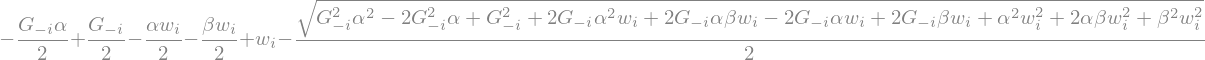

In [10]:
xistar = foc_sol[0][0]
xistar

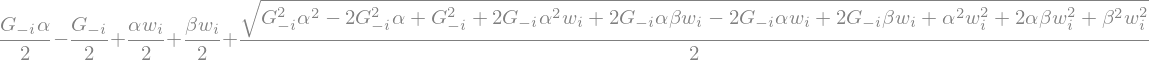

In [11]:
gistar = foc_sol[0][1]
gistar

Calculate *unfunded crowd-out* $$ \frac{d g_i^*}{d G_{-i}} |_{d w_i = 0} $$

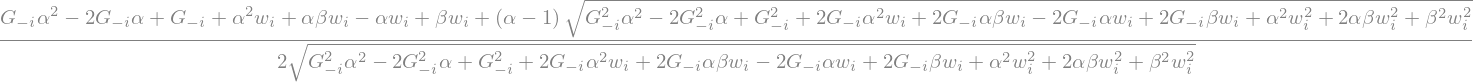

In [12]:
CO_unfunded = gistar.diff(Gi).simplify()
CO_unfunded

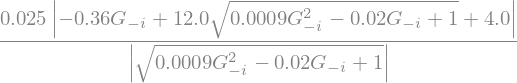

In [13]:
CO_unfunded_plot = abs( CO_unfunded.subs([(alpha,0.4),(beta,0.1),(wi,40)]) )
CO_unfunded_plot

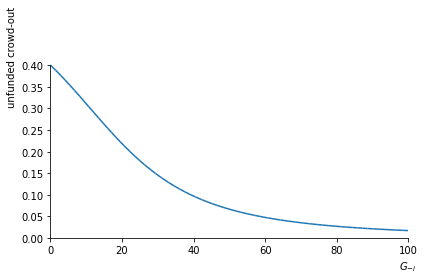

In [14]:
plot(CO_unfunded_plot, (Gi,0,100), xlabel="$G_{-i}$", ylabel="unfunded crowd-out")

Calculate *balanced-budget crowd-out* $$ \frac{d g_i^*}{d G_{-i}} |_{d w_i = - d G_{-i}} $$

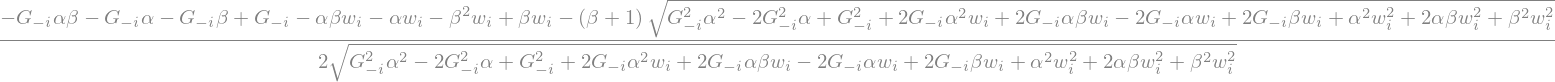

In [15]:
CO_balanced = ( gistar.diff(Gi) + gistar.diff(wi) * (-1) ).simplify()
CO_balanced

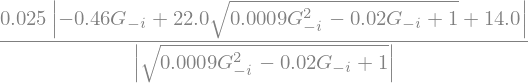

In [16]:
CO_balanced_plot = abs( CO_balanced.subs([(alpha,0.4),(beta,0.1),(wi,40)]) )
CO_balanced_plot

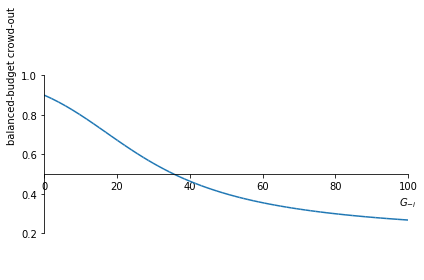

In [17]:
plot(CO_balanced_plot, (Gi,0,100), ylim=[0,1], xlabel="$G_{-i}$", ylabel="balanced-budget crowd-out")